# Data Visualizations Workbook

# Exploring, Analyzing, and Interpreting Results

Now that we pulled the business data from the Yelp API, we will explore the data to gain insight.

Our guiding questions will be:
- **What does each specific region look like, statistically?**
  - Are there any differences in pricing, ratings, reviews, b/t ea. area?
  - Are there any clusters of businesses?
     - Indicating local competition as well as land quality/availability
- **What are the correlations between each metric?**
 
- **What are the price ranges for each area?**
    - gives indication clientele
        - lower price more broadly appealing
        - higher pricing more discerning, luxury clientele
    - guides broad revenue perspective
 
- **Ratings**
 - Satisfied/unsatisfied clients
 - diff b/t regions
 
- **Number of reviews**
 - popularity of businesses
 - higher number = larger sample size for avg review


# Importing Packages

First, we are going to import our packages for use in the notebook. We are going to import packages to access our saved data; packages to explore the data and generate statistics; and we will use the final packages to create visualizations.

In [2]:
# Accessing stored data
import csv
import json

# Data exploration and statistics
import pandas as pd
import numpy as np

# Creating Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

 We will use our CSV package to load in the data generated previously in the Data Acquisition notebook.

## San Diego Wineries

In [3]:
# Read in data from the San Diego .csv
df_sd_details = pd.read_csv("data/wineries_price_converted.csv")
df_sd_details.reset_index(drop=True, inplace=True)
df_sd_details['City'] = 'San Diego'

# View results
df_sd_details.head()

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego


## Napa Valley Wineries

In [4]:
# Read in data from the Napa Valley .csv
df_nv_details = pd.read_csv("data/wineries_north_price_converted.csv")
df_nv_details.reset_index(drop=True, inplace=True)
df_nv_details['City'] = 'Napa Valley'

# View results
df_nv_details.head()

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Hendry Vineyard and Winery,"3104 Redwood Rd Napa, CA 94558",mO8n3zTLoFhlmcfQr7X_TQ,wineries,Wineries,5.0,658,$$,38.321680,-122.344810,2,Napa Valley
1,Domaine Carneros,"1240 Duhig Rd Napa, CA 94559",8eGTOeEQpUpYb89ISug3ag,wineries,Wineries,4.0,2239,$$,38.255534,-122.351391,2,Napa Valley
2,Paraduxx Winery,"7257 Silverado Trl Napa, CA 94558",cBFZALrZbLV5XBsiPcgknQ,wineries,Wineries,4.5,373,$$,38.435480,-122.351430,2,Napa Valley
3,Jarvis Winery,"2970 Monticello Rd Napa, CA 94558",NPkAqW68Og5eBofEpPiRXQ,wineries,Wineries,4.5,209,$$$,38.357010,-122.213620,3,Napa Valley
4,White Rock Vineyards,"1112 Loma Vista Dr Napa, CA 94558",shbhrTpVLOdql8hNGC9NDw,wineries,Wineries,5.0,55,$$,38.377683,-122.286565,2,Napa Valley


# Exploring the Data for Each City

## EDA: San Diego Business Details

In [5]:
df_sd_details.head()

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego


In [6]:
## First, we want to ensure the data is clean

In [7]:
# Check for null values

df_sd_details.isna().sum()

name                0
location            0
Business ID         0
alias               0
title               0
rating              0
review_count        0
price              25
latitude            0
longitude           0
price_converted     0
City                0
dtype: int64

In [8]:
# Determine if best to fill those values
df_sd_details['price'].value_counts()

$$     53
$       3
$$$     1
Name: price, dtype: int64

In [9]:
# Fill with "$$", which is the mean, median, and mode all in one!
df_sd_details.fillna(value="$$", inplace=True)

## Confirm all NaN are fixed
df_sd_details.isna().sum()

name               0
location           0
Business ID        0
alias              0
title              0
rating             0
review_count       0
price              0
latitude           0
longitude          0
price_converted    0
City               0
dtype: int64

In [10]:
# Add prior converter function for updated price values
def convert_price(dataframe):
    ''' - Requires a dataframe with the 'price' column elements being NaN,
    $, $$, $$$, $$$$, or $$$$$.
    - Takes a pre-existing dataframe and adds a column to store the \
    conversion from $ to an integer.'''
    
    # Converting $s to integers, then saving to new column.
    dataframe['price_converted'] = dataframe.loc[:,'price'] \
    .map({np.nan:0, '$':1, '$$':2, '$$$':3, '$$$$':4, '$$$$$':5})
    
    return dataframe

In [11]:
# Run function to correct for any "0" values in 'price_converted' column
convert_price(df_sd_details)

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Roll OutThe Barrell Charity Event by Meritage,"162 S Rancho Santa Fe Rd Encinitas, CA 92024",wyLm9fIoamN-VALcu3nUVg,wineries,Wineries,4.0,1,$$,33.037121,-117.238654,2,San Diego
78,Licores Kentucky,Calle Puerto y 3ra S/N Col. Centro 22000 Tijua...,B7gID-M2EsdpthrTcwTNYA,wineries,Wineries,5.0,1,$$,32.534236,-117.034976,2,San Diego
79,Barrica 9,Av. Revolución 1265 Col. Zona Centro 22000 Tij...,HxTqmzT4G43iAKXrB3pqQg,winetastingroom,Wine Tasting Room,4.5,7,$$,32.530430,-117.036500,2,San Diego
80,"RL Liquid Assets, Inc","5909 Sea Lion Pl Ste G Carlsbad, CA 92010",-STecUUsS69EMSE7PxwPwA,wineries,Wineries,3.0,2,$$,33.134743,-117.248093,2,San Diego


In [12]:
df_sd_details.describe()

,rating,review_count,latitude,longitude,price_converted
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,4.530488,63.646341,32.926059,-117.014344,1.975610
std,0.594977,102.761184,0.175643,0.146575,0.220863
min,1.000000,1.000000,32.512608,-117.302813,1.000000
25%,4.500000,7.000000,32.767187,-117.136315,2.000000
50%,4.500000,26.000000,33.020775,-117.017288,2.000000
75%,5.000000,93.250000,33.063279,-116.920717,2.000000
max,5.000000,626.000000,33.134743,-116.750704,3.000000


### San Diego - Good Plots

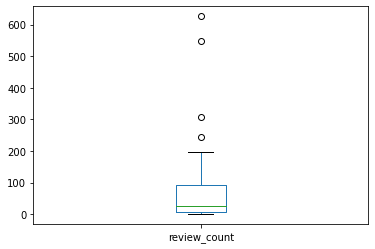

In [13]:
# Visualizing the centrality of the data.

df_sd_details['review_count'].plot(kind='box');

Our box plot for the review counts of San Diego show that almost 75% of businesses have fewer than 100 reviews, with some **close to 200**. Four businesses have significantly more reviews, which raises the question of _why_ those businesses are so popular?

Let's get a closer look at the data without those outliers.

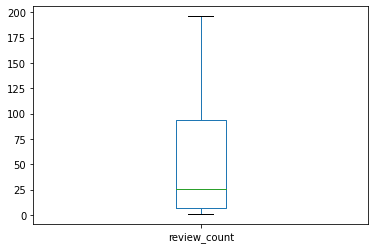

In [14]:
# Boxplot using the same data as above with the outliers removed.

df_sd_details['review_count'].plot(kind='box', showfliers=False);

This new box plot gives us a clearer idea of the spread of the data. Half of the reviews call between about 10 to 90 reviews, with an average close to 30 reviews.

Where does the other half of the data fall? Let's use a histogram to visualize the data differently.

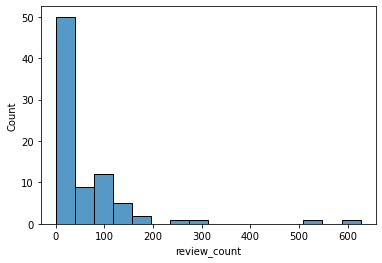

In [15]:
# Counting the occurences of each review total

sns.histplot(df_sd_details['review_count']);

This histogram shows that a large number of businesses have below 50 reviews. This matches our understanding from above.

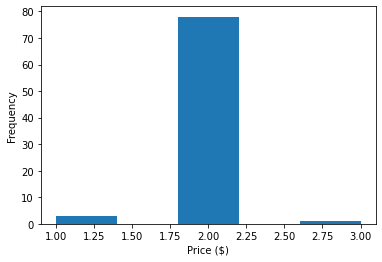

In [16]:
fig, ax = plt.subplots()
df_sd_details['price_converted'].plot.hist(bins=5)
ax.set_xlabel('Price ($)');

## EDA: Napa Valley Business Details

In [17]:
df_nv_details.head()

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Hendry Vineyard and Winery,"3104 Redwood Rd Napa, CA 94558",mO8n3zTLoFhlmcfQr7X_TQ,wineries,Wineries,5.0,658,$$,38.321680,-122.344810,2,Napa Valley
1,Domaine Carneros,"1240 Duhig Rd Napa, CA 94559",8eGTOeEQpUpYb89ISug3ag,wineries,Wineries,4.0,2239,$$,38.255534,-122.351391,2,Napa Valley
2,Paraduxx Winery,"7257 Silverado Trl Napa, CA 94558",cBFZALrZbLV5XBsiPcgknQ,wineries,Wineries,4.5,373,$$,38.435480,-122.351430,2,Napa Valley
3,Jarvis Winery,"2970 Monticello Rd Napa, CA 94558",NPkAqW68Og5eBofEpPiRXQ,wineries,Wineries,4.5,209,$$$,38.357010,-122.213620,3,Napa Valley
4,White Rock Vineyards,"1112 Loma Vista Dr Napa, CA 94558",shbhrTpVLOdql8hNGC9NDw,wineries,Wineries,5.0,55,$$,38.377683,-122.286565,2,Napa Valley


In [18]:
# Check for null values

df_nv_details.isna().sum()

name                 0
location             0
Business ID          0
alias                0
title                0
rating               0
review_count         0
price              166
latitude             0
longitude            0
price_converted      0
City                 0
dtype: int64

In [19]:
# Determine if best to fill those values
df_nv_details['price'].value_counts()

$$      156
$$$      61
$$$$     16
$         4
Name: price, dtype: int64

In [20]:
nv_not_zero = df_nv_details[df_nv_details['price_converted'] > 0]
nv_price_mean = nv_not_zero['price_converted'].agg('mean')
print(nv_price_mean)
nv_price_median = nv_not_zero['price_converted'].agg('median')
print(nv_price_median)

2.3755274261603376
2.0


In [21]:
# Fill with "$$", representing the majority of the data
df_nv_details['price'].fillna(value="$$", inplace=True)

## Confirm all NaN are fixed
df_nv_details.isna().sum()

name               0
location           0
Business ID        0
alias              0
title              0
rating             0
review_count       0
price              0
latitude           0
longitude          0
price_converted    0
City               0
dtype: int64

In [22]:
# Add prior converter function for updated price values
def convert_price(dataframe):
    ''' - Requires a dataframe with the 'price' column elements being NaN,
    $, $$, $$$, $$$$, or $$$$$.
    - Takes a pre-existing dataframe and adds a column to store the \
    conversion from $ to an integer.'''
    
    # Converting $s to integers, then saving to new column.
    dataframe['price_converted'] = dataframe.loc[:,'price'] \
    .map({np.nan:0, '$':1, '$$':2, '$$$':3, '$$$$':4, '$$$$$':5})
    
    return dataframe

In [23]:
# Run function to correct for any "0" values in 'price_converted' column
convert_price(df_nv_details)

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Hendry Vineyard and Winery,"3104 Redwood Rd Napa, CA 94558",mO8n3zTLoFhlmcfQr7X_TQ,wineries,Wineries,5.0,658,$$,38.321680,-122.344810,2,Napa Valley
1,Domaine Carneros,"1240 Duhig Rd Napa, CA 94559",8eGTOeEQpUpYb89ISug3ag,wineries,Wineries,4.0,2239,$$,38.255534,-122.351391,2,Napa Valley
2,Paraduxx Winery,"7257 Silverado Trl Napa, CA 94558",cBFZALrZbLV5XBsiPcgknQ,wineries,Wineries,4.5,373,$$,38.435480,-122.351430,2,Napa Valley
3,Jarvis Winery,"2970 Monticello Rd Napa, CA 94558",NPkAqW68Og5eBofEpPiRXQ,wineries,Wineries,4.5,209,$$$,38.357010,-122.213620,3,Napa Valley
4,White Rock Vineyards,"1112 Loma Vista Dr Napa, CA 94558",shbhrTpVLOdql8hNGC9NDw,wineries,Wineries,5.0,55,$$,38.377683,-122.286565,2,Napa Valley
...,...,...,...,...,...,...,...,...,...,...,...,...
398,Andretti Winery,"1625 Trancas St NAPA, CA 94558",NKCMqIlRopcSMA15JpeyJg,wineries,Wineries,3.5,311,$$,38.321516,-122.304108,2,Napa Valley
399,Lionstone International,"21481 8th St E Sonoma, CA 95476",pW9QPUkm2_tTXLCzyQ6qvg,wineries,Wineries,1.0,1,$$,38.262062,-122.442036,2,Napa Valley
400,Napa Vinyards,"Napa, CA 94558",UwgQWRkTzlFnw3-QYCaBlQ,wineries,Wineries,1.0,1,$$,38.383260,-122.313060,2,Napa Valley
401,Cook Vinyard Management,"19626 Eighth St E Sonoma, CA 95476",LxMkyxBokxu6iRIsuMF5Tw,wineries,Wineries,1.0,1,$$,38.286261,-122.434893,2,Napa Valley


In [24]:
df_nv_details.describe()

,rating,review_count,latitude,longitude,price_converted
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,4.558313,85.310174,38.329524,-122.334085,2.220844
std,0.696258,195.505406,0.069026,0.078398,0.521538
min,1.000000,1.000000,38.150444,-122.494690,1.000000
25%,4.500000,3.000000,38.288946,-122.396858,2.000000
50%,5.000000,14.000000,38.317054,-122.317486,2.000000
75%,5.000000,73.500000,38.387639,-122.286800,2.000000
max,5.000000,2239.000000,38.465419,-122.101645,4.000000


# EDA: Combined Cities - Business Details

In [25]:
combined = pd.concat([df_sd_details, df_nv_details], ignore_index = 0)
combined

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...
398,Andretti Winery,"1625 Trancas St NAPA, CA 94558",NKCMqIlRopcSMA15JpeyJg,wineries,Wineries,3.5,311,$$,38.321516,-122.304108,2,Napa Valley
399,Lionstone International,"21481 8th St E Sonoma, CA 95476",pW9QPUkm2_tTXLCzyQ6qvg,wineries,Wineries,1.0,1,$$,38.262062,-122.442036,2,Napa Valley
400,Napa Vinyards,"Napa, CA 94558",UwgQWRkTzlFnw3-QYCaBlQ,wineries,Wineries,1.0,1,$$,38.383260,-122.313060,2,Napa Valley
401,Cook Vinyard Management,"19626 Eighth St E Sonoma, CA 95476",LxMkyxBokxu6iRIsuMF5Tw,wineries,Wineries,1.0,1,$$,38.286261,-122.434893,2,Napa Valley


In [26]:
combined.head()

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego


In [27]:
combined.describe()

,rating,review_count,latitude,longitude,price_converted
count,485.000000,485.000000,485.000000,485.000000,485.000000
mean,4.553608,81.647423,37.415949,-121.434665,2.179381
std,0.679703,183.248447,2.029642,1.998159,0.492493
min,1.000000,1.000000,32.512608,-122.494690,1.000000
25%,4.500000,4.000000,38.247393,-122.371093,2.000000
50%,4.500000,15.000000,38.297370,-122.295921,2.000000
75%,5.000000,79.000000,38.363850,-122.253380,2.000000
max,5.000000,2239.000000,38.465419,-116.750704,4.000000


In [28]:
combined.groupby('City').agg(['count', 'mean', min, 'median', max])['price_converted']

,count,mean,min,median,max
City,,,,,
Napa Valley,403,2.220844,1,2,4
San Diego,82,1.975610,1,2,3


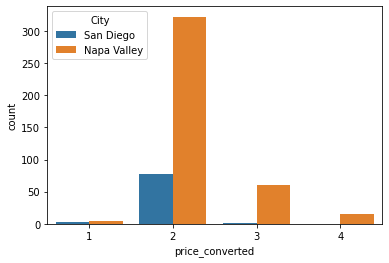

In [29]:
sns.countplot(data=combined, hue='City', x='price_converted' );

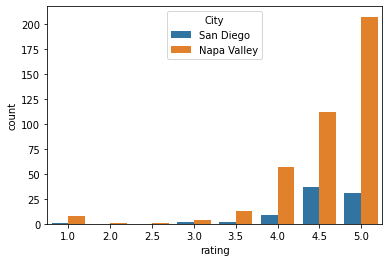

In [30]:
sns.countplot(data=combined, hue='City', x='rating' );

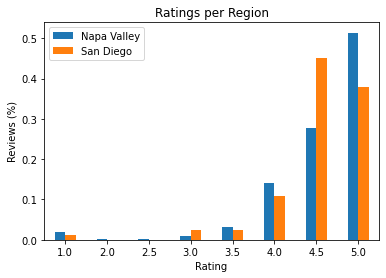

In [31]:
# Making a grouped bar chart for each city normalizing the ratings
norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame()
norm_rating.unstack(0).plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xticks(rotation = 0)
plt.xlabel('Rating')
plt.ylabel('Reviews (%)')
plt.title('Ratings per Region');

In [32]:
# Exploring how to normalize values, then change the structure of a dataframe
# normalized_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
# normalized_rating

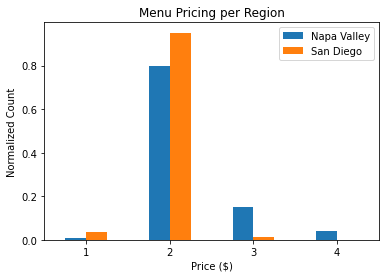

In [33]:
# Making a grouped bar chart for each city normalizing the ratings
norm_pricing = combined.groupby('City')['price_converted'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
norm_pricing.plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xlabel('Price ($)')
plt.xticks(rotation = 0)
plt.ylabel('Normalized Count')
plt.title('Menu Pricing per Region');

In [34]:
# # Comparing Review Counts between regions
# norm_r_c = combined.groupby('City')['review_count'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
# norm_r_c.plot(kind='bar')
# legend = plt.legend()
# legend.get_texts()[0].set_text('Napa Valley')
# legend.get_texts()[1].set_text('San Diego')
# plt.xlabel('Number of Reviews')
# plt.xticks(rotation = 0)
# plt.ylabel('Normalized Count')
# plt.title('Review Counts per Region');

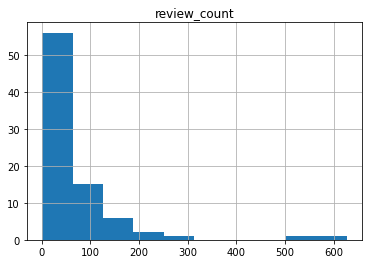

In [35]:
combined_sd = combined[combined.loc[:,'City'] == 'San Diego']
combined_sd.hist(column = 'review_count');

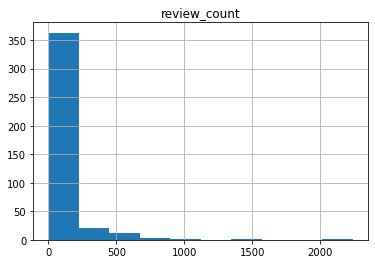

In [36]:
combined_sd = combined[combined.loc[:,'City'] == 'Napa Valley']
combined_sd.hist(column = 'review_count');

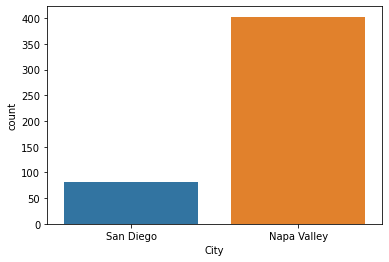

In [37]:
# Determining # businesses for NV vs. SD

sns.countplot(x=combined['City']);

In [38]:
# rc_norm = combined.groupby('City')['review_count'].value_counts(normalize=True)
# rc_norm = rc_norm.to_frame().unstack(0, fill_value=0).reset_index(drop=True)
# rc_norm

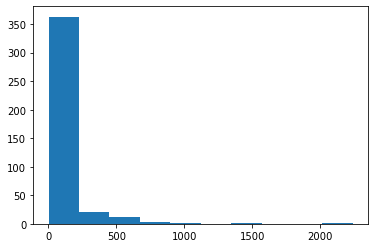

In [39]:
combined_sd = combined[combined.loc[:,'City'] == 'Napa Valley']
combined_sd['review_count'].hist(grid=False);

# Finished Vis

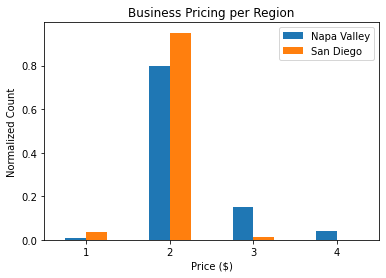

In [40]:
# Comparing 'price' values between regions
norm_pricing = combined.groupby('City')['price_converted'].value_counts(normalize=True).to_frame().unstack(0, fill_value=0)
norm_pricing.plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xlabel('Price ($)')
plt.xticks(rotation = 0)
plt.ylabel('Normalized Count')
plt.title('Business Pricing per Region');

# plt.savefig('Business_Pricing_per_Region.png')

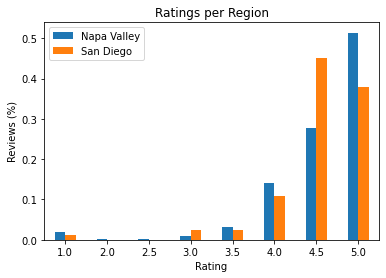

In [41]:
# Making a grouped bar chart for each city normalizing the ratings
norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame().unstack(0).plot(kind='bar')
legend = plt.legend()
legend.get_texts()[0].set_text('Napa Valley')
legend.get_texts()[1].set_text('San Diego')
plt.xticks(rotation = 0)
plt.xlabel('Rating')
plt.ylabel('Reviews (%)')
plt.title('Ratings per Region');

# plt.savefig('Ratings_per_Region.png')

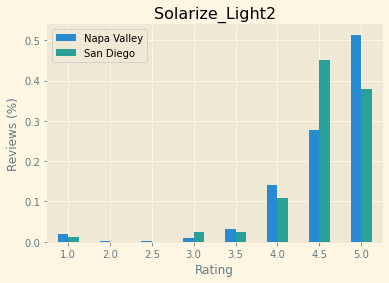

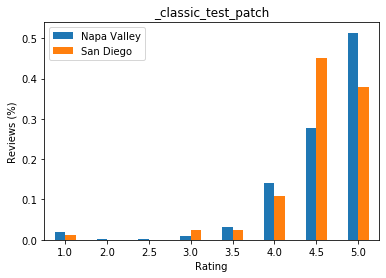

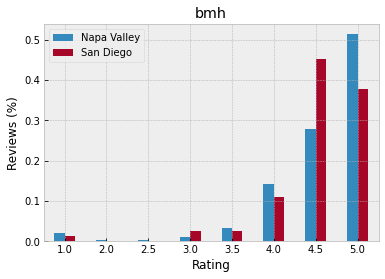

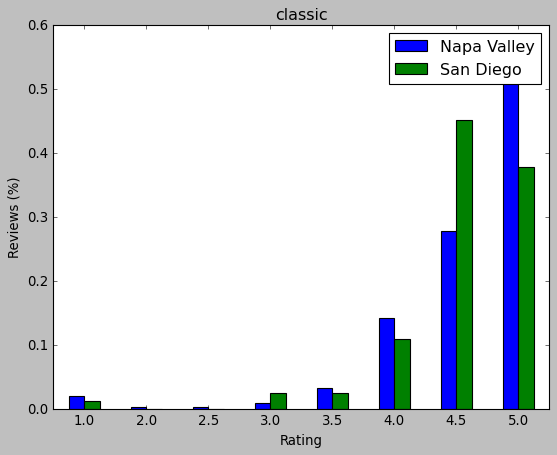

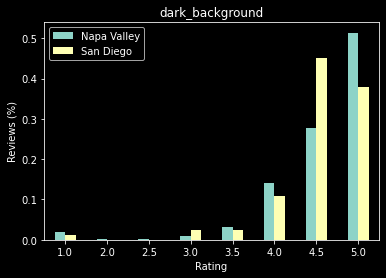

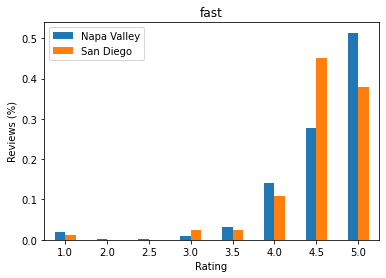

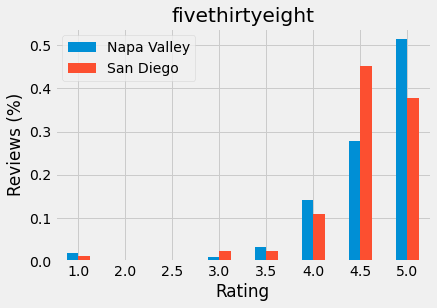

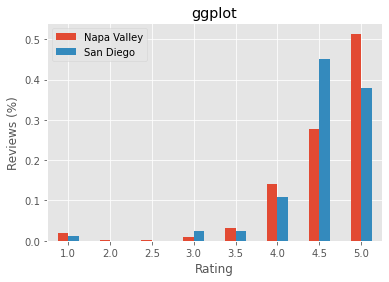

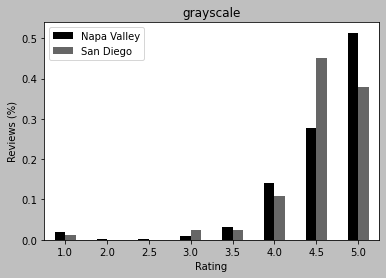

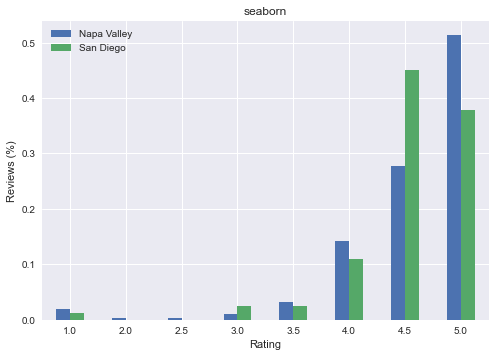

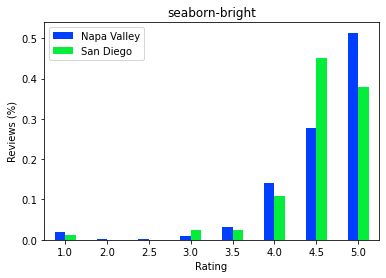

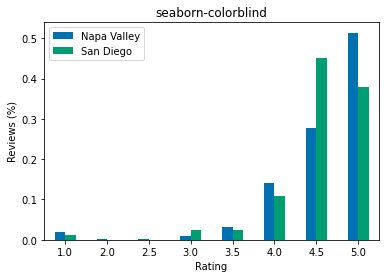

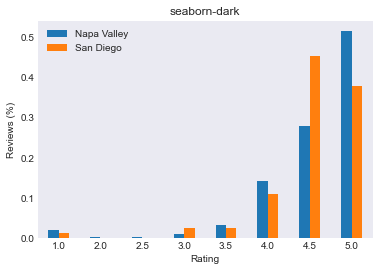

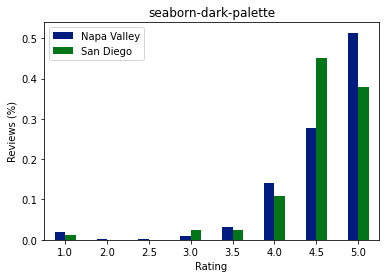

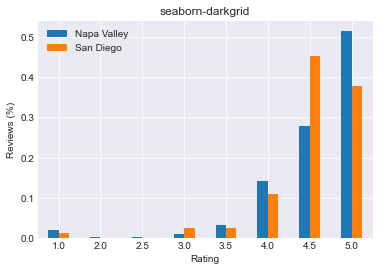

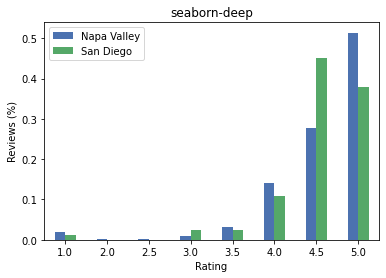

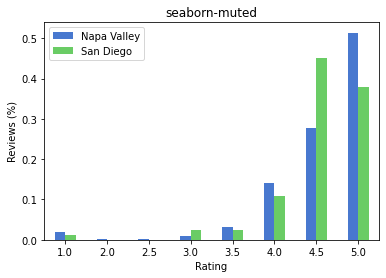

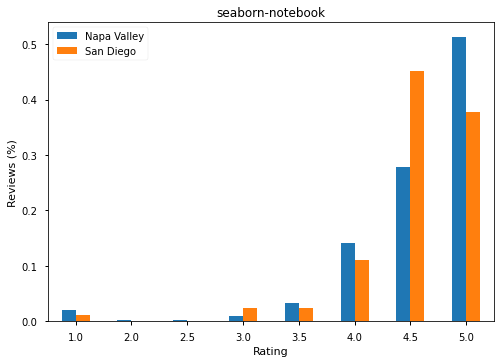

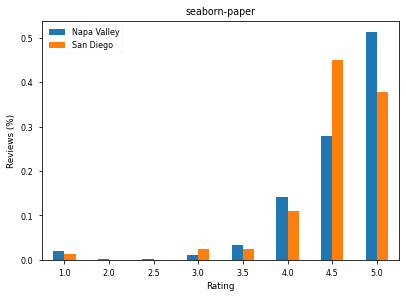

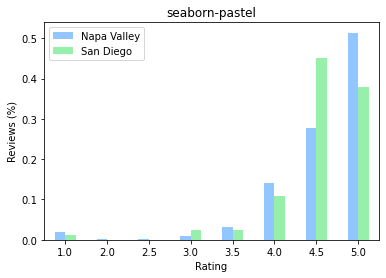

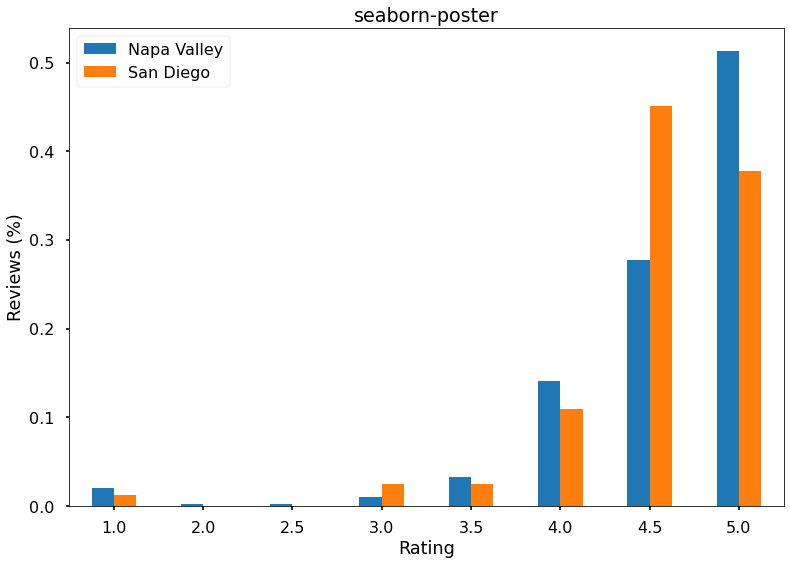

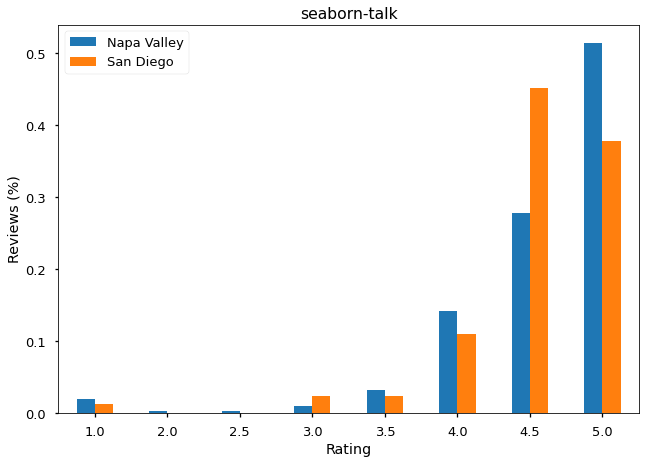

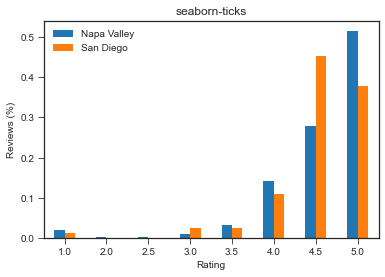

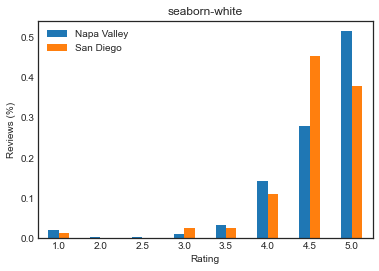

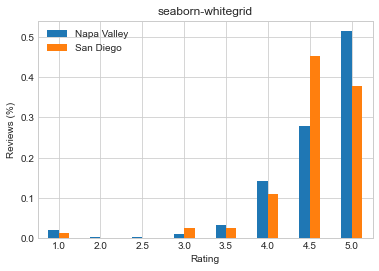

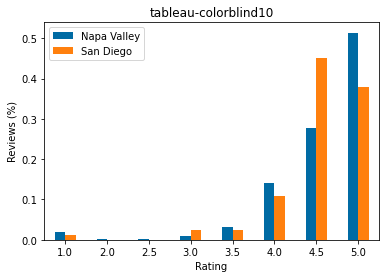

In [44]:
for style in plt.style.available:
    with plt.style.context(style):
        
        # Making a grouped bar chart for each city normalizing the ratings
        norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame().unstack(0).plot(kind='bar')
        legend = plt.legend()
        legend.get_texts()[0].set_text('Napa Valley')
        legend.get_texts()[1].set_text('San Diego')
        plt.xticks(rotation = 0)
        plt.xlabel('Rating')
        plt.ylabel('Reviews (%)')
        plt.title(style)
        plt.show();

        # plt.savefig('Ratings_per_Region.png')

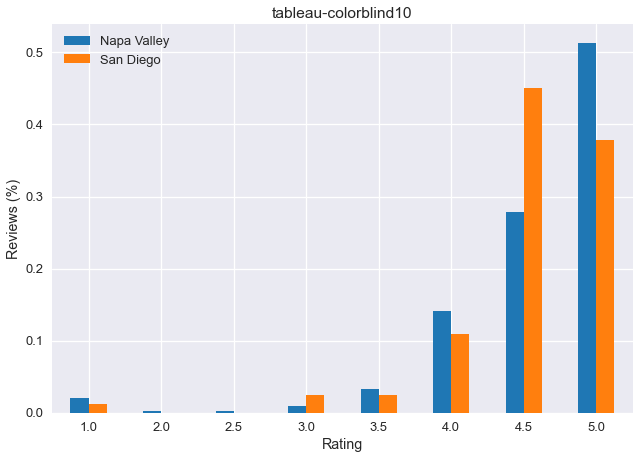

In [48]:
# Combining SNS styles - merge settings of first with second
with plt.style.context(['seaborn-talk', 'seaborn-darkgrid']):

    # Making a grouped bar chart for each city normalizing the ratings
    norm_rating = combined.groupby('City')['rating'].value_counts(normalize=True).to_frame().unstack(0).plot(kind='bar')
    legend = plt.legend()
    legend.get_texts()[0].set_text('Napa Valley')
    legend.get_texts()[1].set_text('San Diego')
    plt.xticks(rotation = 0)
    plt.xlabel('Rating')
    plt.ylabel('Reviews (%)')
    plt.title(style)
    plt.show();

    # plt.savefig('Ratings_per_Region.png')

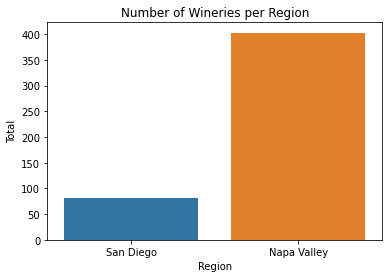

In [49]:
# Show count of businesses per city

sns.countplot(x=combined['City'])
plt.xlabel('Region')
plt.ylabel('Total')
plt.title('Number of Wineries per Region');

# plt.savefig('Number_of_Wineries_per_Region.png')

In [53]:
df_nv = combined[combined['City'] == 'Napa Valley']
df_nv

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Hendry Vineyard and Winery,"3104 Redwood Rd Napa, CA 94558",mO8n3zTLoFhlmcfQr7X_TQ,wineries,Wineries,5.0,658,$$,38.321680,-122.344810,2,Napa Valley
1,Domaine Carneros,"1240 Duhig Rd Napa, CA 94559",8eGTOeEQpUpYb89ISug3ag,wineries,Wineries,4.0,2239,$$,38.255534,-122.351391,2,Napa Valley
2,Paraduxx Winery,"7257 Silverado Trl Napa, CA 94558",cBFZALrZbLV5XBsiPcgknQ,wineries,Wineries,4.5,373,$$,38.435480,-122.351430,2,Napa Valley
3,Jarvis Winery,"2970 Monticello Rd Napa, CA 94558",NPkAqW68Og5eBofEpPiRXQ,wineries,Wineries,4.5,209,$$$,38.357010,-122.213620,3,Napa Valley
4,White Rock Vineyards,"1112 Loma Vista Dr Napa, CA 94558",shbhrTpVLOdql8hNGC9NDw,wineries,Wineries,5.0,55,$$,38.377683,-122.286565,2,Napa Valley
...,...,...,...,...,...,...,...,...,...,...,...,...
398,Andretti Winery,"1625 Trancas St NAPA, CA 94558",NKCMqIlRopcSMA15JpeyJg,wineries,Wineries,3.5,311,$$,38.321516,-122.304108,2,Napa Valley
399,Lionstone International,"21481 8th St E Sonoma, CA 95476",pW9QPUkm2_tTXLCzyQ6qvg,wineries,Wineries,1.0,1,$$,38.262062,-122.442036,2,Napa Valley
400,Napa Vinyards,"Napa, CA 94558",UwgQWRkTzlFnw3-QYCaBlQ,wineries,Wineries,1.0,1,$$,38.383260,-122.313060,2,Napa Valley
401,Cook Vinyard Management,"19626 Eighth St E Sonoma, CA 95476",LxMkyxBokxu6iRIsuMF5Tw,wineries,Wineries,1.0,1,$$,38.286261,-122.434893,2,Napa Valley


In [57]:
# Creating geospatial view of Napa Valley Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(df_nv, lat= "latitude", lon= "longitude", 
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ",
                                 "latitude":"Latitude ",
                                 "longitude":"Longitude ",
                                 'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_nv["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=9.8, title='Napa Valley Wineries',
                        mapbox_style='light', width=900, height=900)
fig.show()

<Figure size 432x288 with 0 Axes>

In [58]:
# Creating geospatial view of Napa Valley Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(df_nv, lat= "latitude", lon= "longitude", 
                         range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ",
                                 "latitude":"Latitude ",
                                 "longitude":"Longitude ",
                                 'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_nv["name"],
                        size_max=15, zoom=10.25, title='Napa Valley Wineries',
                        mapbox_style='light', width=900, height=900)
fig.show()

<Figure size 432x288 with 0 Axes>

In [59]:
df_sd = combined[combined['City'] == 'San Diego']
df_sd

,name,location,Business ID,alias,title,rating,review_count,price,latitude,longitude,price_converted,City
0,Bernardo Winery,"13330 Paseo Del Verano Norte San Diego, CA 92128",DknnpiG1p4OoM1maFshzXA,winetastingroom,Wine Tasting Room,4.5,626,$$,33.032800,-117.046460,2,San Diego
1,Callaway Vineyard & Winery,"517 4th Ave Ste 101 San Diego, CA 92101",Cn2_bpTngghYW1ej4zreZg,winetastingroom,Wine Tasting Room,5.0,100,$$,32.710751,-117.160918,2,San Diego
2,Négociant Winery,"2419 El Cajon Blvd San Diego, CA 92104",Cc1sQWRWgGyMCjzX2mmMQQ,winetastingroom,Wine Tasting Room,4.5,103,$$,32.754880,-117.138280,2,San Diego
3,San Pasqual Winery - Seaport Village,"805 W Harbor Dr San Diego, CA 92101",gMW1RvyLu90RSQAY9UrIHw,winetastingroom,Wine Tasting Room,4.5,138,$$,32.708732,-117.168195,2,San Diego
4,Domaine Artefact Vineyard & Winery,"15404 Highland Valley Rd Escondido, CA 92025",WqVbxY77Ag96X90LultCUw,wineries,Wineries,5.0,96,$$,33.068170,-117.001600,2,San Diego
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Roll OutThe Barrell Charity Event by Meritage,"162 S Rancho Santa Fe Rd Encinitas, CA 92024",wyLm9fIoamN-VALcu3nUVg,wineries,Wineries,4.0,1,$$,33.037121,-117.238654,2,San Diego
78,Licores Kentucky,Calle Puerto y 3ra S/N Col. Centro 22000 Tijua...,B7gID-M2EsdpthrTcwTNYA,wineries,Wineries,5.0,1,$$,32.534236,-117.034976,2,San Diego
79,Barrica 9,Av. Revolución 1265 Col. Zona Centro 22000 Tij...,HxTqmzT4G43iAKXrB3pqQg,winetastingroom,Wine Tasting Room,4.5,7,$$,32.530430,-117.036500,2,San Diego
80,"RL Liquid Assets, Inc","5909 Sea Lion Pl Ste G Carlsbad, CA 92010",-STecUUsS69EMSE7PxwPwA,wineries,Wineries,3.0,2,$$,33.134743,-117.248093,2,San Diego


In [60]:
# Creating geospatial view of San Diego Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(df_sd, lat= "latitude", lon= "longitude",
                        color= "price_converted", range_color= (0, 3),
                        labels= {"price_converted": "Price ($) ", 
                                "latitude":"Latitude ","longitude":"Longitude ",
                                'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_sd["name"],
                        color_continuous_scale=px.colors.sequential.Greys,
                        size_max=15, zoom=9.75, title='San Diego Wineries',
                        mapbox_style='light', width=900, height=900)
fig.show()

<Figure size 432x288 with 0 Axes>

In [61]:
# # Creating geospatial view of San Diego Wineries

# with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
#     token = json.load(f)

# open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
# token = token['token']

# px.set_mapbox_access_token(token)

# fig = px.scatter_mapbox(df_sd, lat= "latitude", lon= "longitude",
#                         color= "review_count", range_color= (0,150),
#                         labels= {"review_count": "Number of Reviews ", 
#                                 "latitude":"Latitude ","longitude":"Longitude ",
#                                 'review_count':'Number of Reviews '},
#                         size= 'review_count', hover_name = df_sd["name"],
#                         color_continuous_scale=px.colors.sequential.Greys,
#                         size_max=15, zoom=9.25, title='San Diego Wineries',
#                         mapbox_style='light', width=800, height=800)
# fig.show()

In [62]:
# Creating geospatial view of San Diego Wineries

with open(r'C:\Users\bmcca\.secret\mapbox_api.json') as f:
    token = json.load(f)

open(r'C:\Users\bmcca\.secret\mapbox_api.json').read()
    
token = token['token']

px.set_mapbox_access_token(token)

fig = px.scatter_mapbox(df_sd, lat= "latitude", lon= "longitude",
                        range_color= (0,150),
                        labels= {"review_count": "Number of Reviews ", 
                                "latitude":"Latitude ","longitude":"Longitude ",
                                'review_count':'Number of Reviews '},
                        size= 'review_count', hover_name = df_sd["name"],
                        size_max=15, zoom=9.25, title='San Diego Wineries',
                        mapbox_style='light', width=800, height=800)
fig.show();

<Figure size 432x288 with 0 Axes>